# Introduction 

We will work with the Boston dataset. Read about it [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

**Features:** 13 variables

**Target variable:** 1: MEDV - Median value of owner-occupied homes in $1000's

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
boston = pd.read_csv("Boston.csv")

Saving Boston.csv to Boston.csv


In [2]:
print(type(boston))

<class 'pandas.core.frame.DataFrame'>


In [3]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(boston.columns)
print(boston.columns[0])
print(boston.columns[1])



Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')
Unnamed: 0
crim


In [5]:
boston.shape

(506, 15)

**Creating feature and target arrays**

In [8]:
X = boston.drop('medv', axis=1).values #only medv is not here and we extract only the values from the dataframe
print(X.shape)
y = boston['medv'].values

(506, 14)


In [ ]:
print(type(X))


<class 'numpy.ndarray'>


**Ploting house value vs. number of rooms:**

In [9]:
X_rooms = X[:,6]
print(X_rooms.shape) #a vector
print(y.shape)
y = y.reshape(-1, 1) #we transform both X_room and y to matrices 
X_rooms = X_rooms.reshape(-1, 1)
print(X_rooms.shape)
print(y.shape)

(506,)
(506,)
(506, 1)
(506, 1)


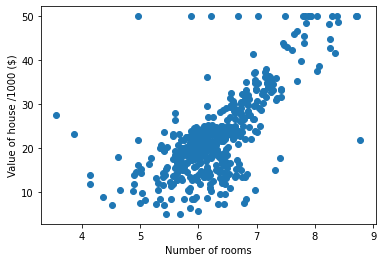

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

The relation looks linear. Let's fit a linear model to this data:

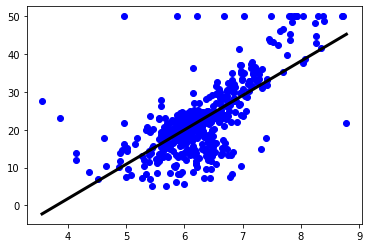

In [11]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1, 1)
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.show()


**Regression mechanics**


* y = ax + b
* y = target
* x = single feature
* a, b = parameters of model
* How do we choose a and b?
* Define an error function for any given line
* Choose the line that minimizes the error function

![](https://drive.google.com/uc?export=view&id=18T85Qi57zqnQ8QN9H_R1G73ksdwq1MWp)

**Higher dimensions:**

![](https://drive.google.com/uc?export=view&id=1jqwXPT5oDl0Blb4VW2ZwRd3iC_qMK6vD) 


In [13]:
#Linear regression on all features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
#random_state 
#Plus sérieusement, random_state définit simplement une graine sur le générateur aléatoire, 
#de sorte que vos divisions de test de train soient toujours déterministes. 
#Si vous ne définissez pas de graine, c'est différent à chaque fois.
#Vérifiez avec Papa Google.
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test) #0.70 error

0.7051609808903441

# Cross valiation:

* Model performance is dependent on way the data is split
* Not representative of the model’s ability to generalize
* Solution: Cross-validation!

![](https://drive.google.com/uc?export=view&id=1ijzjEzu87rHWO6RQVi9bLiQbL81e2xlN) 

Cross-validation and model performance
* 5 folds = 5-fold CV
* 10 folds = 10-fold CV
* k folds = k-fold CV
* More folds = More computationally expensive

**Cross-validation in scikit-learn**

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
np.mean(cv_results)


[ 0.57280576  0.72459569  0.59122862  0.08126754 -0.20963498]


0.35205252566286527

<font color='orange'> Note there may be negative scores because we are reporting the R squared values and not the mean square errors by default !</font>.

![](https://drive.google.com/uc?export=view&id=17OudcgG4QO3ZJQ0XYmIoH1AGwSkCgFCm) 


![](https://drive.google.com/uc?export=view&id=1Fs3Eg9ybZBzOFcYOd_S37Z_SE5nHgJxT) 


# Regularization:

Why regularize?
* Recall: Linear regression minimizes a loss function
* It chooses a coefficient for each feature variable
* Large coefficients can lead to overfitting
* Penalizing large coefficients: Regularization


**Ridge regressions**

Loss function = OLS loss function + $\alpha \sum_i a_i^2$

* $\alpha$: Parameter we need to choose (choosing $\alpha$ here is similar to choosing $k$ in k-NN)
* $\alpha$ controls model complexity ($\alpha=0$: we get back OLS and it can lead to overfitting, $\alpha$ very high can lead to underfitting)

**Ridge regression in scikit-learn**

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test) #0.69


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


0.6977072273529517

**Lasso regression**

Loss function = OLS loss function + $\alpha \sum_i |a_i|$


**Lasso regression in scikit-learn**

In [15]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)#0.59


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.5950229653464186

**Try to improve the score by playing with these two regularizations.**